<a href="https://colab.research.google.com/github/RafaelNovais/MasterAI/blob/master/Covid_IRLipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

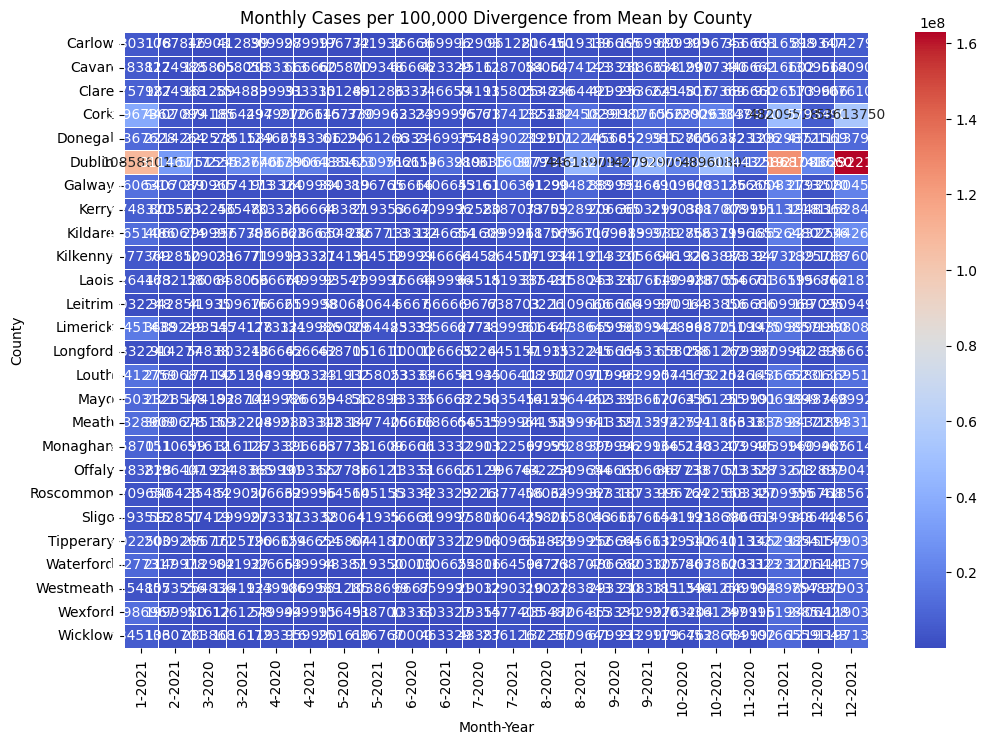

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IRL_counties_Covid19_df.csv")

# Convert TimeStamp column to datetime type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract month and year from TimeStamp column
data['Month'] = data['TimeStamp'].dt.month
data['Year'] = data['TimeStamp'].dt.year

# Group by CountyName, Month, and Year, calculate monthly mean cases per 100,000
monthly_mean = data.groupby(['CountyName', 'Month', 'Year'])['DailyCCase'].mean() * 100000

# Merge mean values back into the original dataframe
data = data.merge(monthly_mean, on=['CountyName', 'Month', 'Year'], suffixes=('', '_mean'))

# Calculate the divergence from mean
data['Divergence'] = data['DailyCCase_mean'] - data['DailyCCase']

# Pivot table to prepare data for heatmap
heatmap_data = data.pivot_table(index='CountyName', columns=['Month', 'Year'], values='Divergence')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f", linewidths=.5)
plt.title('Monthly Cases per 100,000 Divergence from Mean by County')
plt.xlabel('Month-Year')
plt.ylabel('County')
plt.show()


<ipython-input-5-30c994eb986a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_month_1['TotalCasesPer100k'] = data_month_1['DailyCCase'] * 100000 / data_month_1['Population']
<ipython-input-5-30c994eb986a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_month_2['TotalCasesPer100k'] = data_month_2['DailyCCase'] * 100000 / data_month_2['Population']


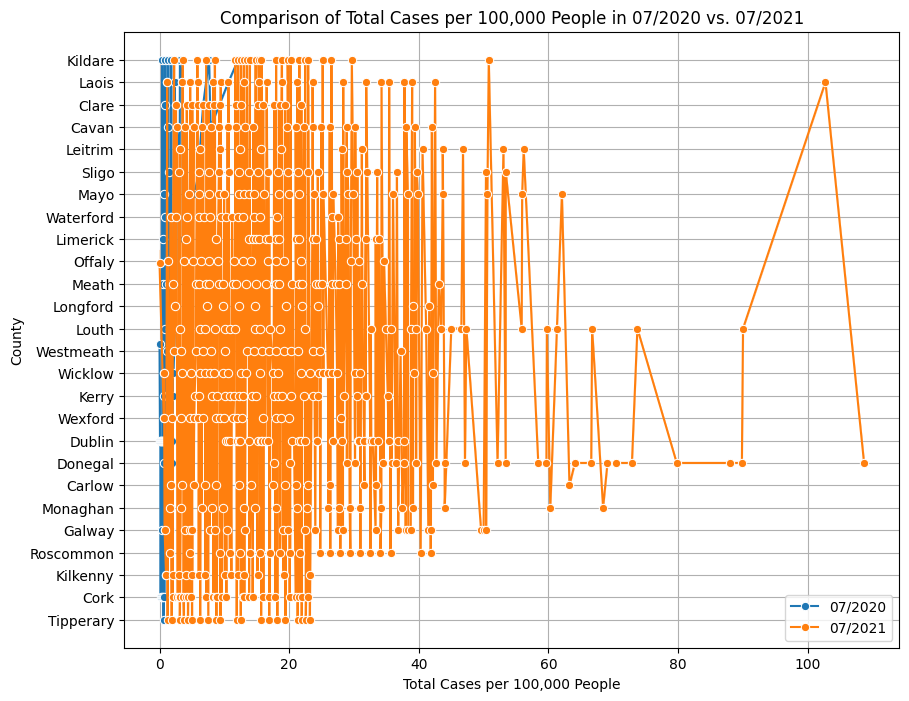

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IRL_counties_Covid19_df.csv")

# Convert TimeStamp column to datetime type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract month and year from TimeStamp column
data['Month'] = data['TimeStamp'].dt.month
data['Year'] = data['TimeStamp'].dt.year

# Filter data for the two months 12 months apart
month_1 = '07'   # July (change as needed)
year_1 = 2020    # (change as needed)
month_2 = '07'   # July (change as needed)
year_2 = 2021    # (change as needed)

data_month_1 = data[(data['Month'] == int(month_1)) & (data['Year'] == year_1)]
data_month_2 = data[(data['Month'] == int(month_2)) & (data['Year'] == year_2)]

# Calculate total cases per 100,000 people for each county for the two months
data_month_1['TotalCasesPer100k'] = data_month_1['DailyCCase'] * 100000 / data_month_1['Population']
data_month_2['TotalCasesPer100k'] = data_month_2['DailyCCase'] * 100000 / data_month_2['Population']

# Merge the two datasets to compare rankings
merged_data = data_month_1.merge(data_month_2, on='CountyName', suffixes=('_1', '_2'))

# Sort counties by total cases per 100,000 for month 1
merged_data.sort_values(by='TotalCasesPer100k_1', ascending=False, inplace=True)

# Plot the slope chart
plt.figure(figsize=(10, 8))
sns.lineplot(data=merged_data, x='TotalCasesPer100k_1', y='CountyName', marker="o", label=f'{month_1}/{year_1}')
sns.lineplot(data=merged_data, x='TotalCasesPer100k_2', y='CountyName', marker="o", label=f'{month_2}/{year_2}')
plt.title(f'Comparison of Total Cases per 100,000 People in {month_1}/{year_1} vs. {month_2}/{year_2}')
plt.xlabel('Total Cases per 100,000 People')
plt.ylabel('County')
plt.legend()
plt.grid(True)
plt.show()


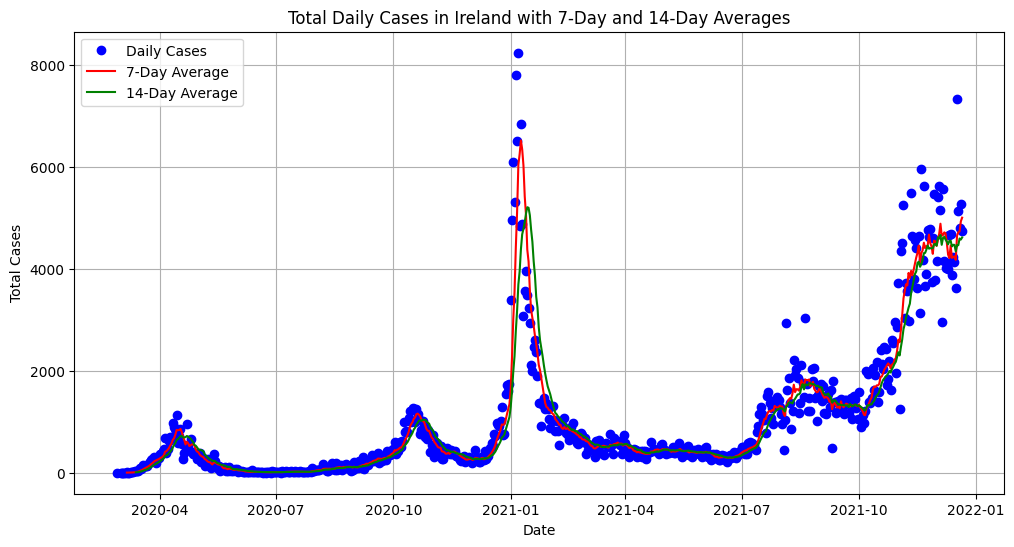

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IRL_counties_Covid19_df.csv")

# Convert TimeStamp column to datetime type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Group by date and sum the total cases for Ireland
ireland_total_cases = data.groupby('TimeStamp')['DailyCCase'].sum()

# Calculate 7-day and 14-day rolling averages
ireland_7day_avg = ireland_total_cases.rolling(window=7).mean()
ireland_14day_avg = ireland_total_cases.rolling(window=14).mean()

# Plot the dot and line time series chart
plt.figure(figsize=(12, 6))
plt.plot(ireland_total_cases.index, ireland_total_cases.values, 'bo', label='Daily Cases')
plt.plot(ireland_total_cases.index, ireland_7day_avg, 'r-', label='7-Day Average')
plt.plot(ireland_total_cases.index, ireland_14day_avg, 'g-', label='14-Day Average')
plt.title('Total Daily Cases in Ireland with 7-Day and 14-Day Averages')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()


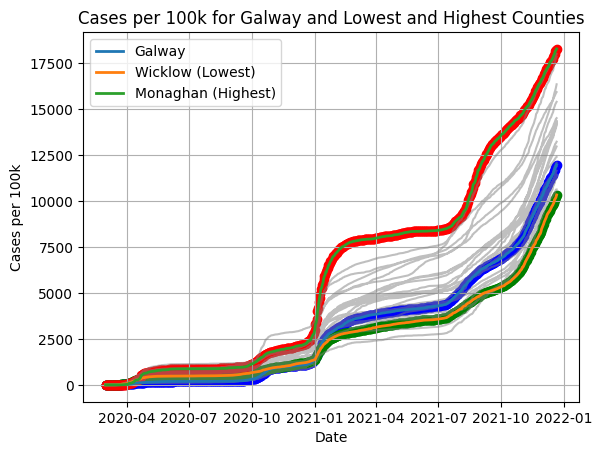

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IRL_counties_Covid19_df.csv")
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

data['CasesPer100k'] = data.groupby('CountyName')['DailyCCase'].cumsum() * 100000 / data['Population']

# Find counties with lowest and highest cumulative cases per 100,000
lowest_county = data.groupby('CountyName')['CasesPer100k'].max().idxmin()
highest_county = data.groupby('CountyName')['CasesPer100k'].max().idxmax()
galway_data = data[data['CountyName'] == 'Galway']
lowest_data = data[data['CountyName'] == lowest_county]
highest_data = data[data['CountyName'] == highest_county]

# Plot
other_counties = data[~data['CountyName'].isin([lowest_county, highest_county, 'Galway'])]
plt.plot(other_counties['TimeStamp'], other_counties['CasesPer100k'], color='gray', alpha=0.5)
plt.plot(galway_data['TimeStamp'], galway_data['CasesPer100k'], label='Galway', linewidth=2)
plt.plot(lowest_data['TimeStamp'], lowest_data['CasesPer100k'], label=f'{lowest_county} (Lowest)', linewidth=2)
plt.plot(highest_data['TimeStamp'], highest_data['CasesPer100k'], label=f'{highest_county} (Highest)', linewidth=2)
plt.scatter(galway_data['TimeStamp'], galway_data['CasesPer100k'], color='blue')
plt.scatter(lowest_data['TimeStamp'], lowest_data['CasesPer100k'], color='green')
plt.scatter(highest_data['TimeStamp'], highest_data['CasesPer100k'], color='red')
plt.title('Cases per 100k for Galway and Lowest and Highest Counties')
plt.xlabel('Date')
plt.ylabel('Cases per 100k')
plt.legend()

# Show plot
plt.grid(True)
plt.show()
